In [1]:
"""
Modified from hands on machine learning by aurelien geron
Using the 'Medical Cost Personal Datasets' kaggle dataset
Objective: predict insurance costs
"""
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get data

In [2]:
df = pd.read_csv('./datasets/insurance-costs.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# create a test and train set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["sex"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

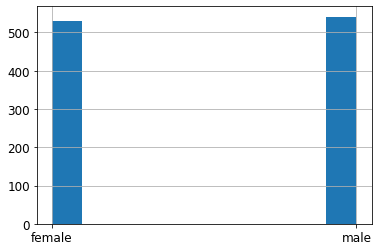

In [5]:
strat_train_set["sex"].hist()

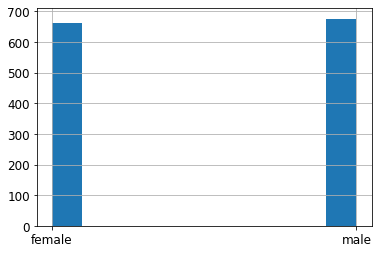

In [6]:
df["sex"].hist()

In [7]:
strat_train_set.head()

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.80,1,no,southwest,35160.13457
1157,23,female,23.18,2,no,northwest,14426.07385
944,62,male,39.93,0,no,southeast,12982.87470
864,51,male,25.40,0,no,southwest,8782.46900
342,60,female,27.55,0,no,northeast,13217.09450


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1f1722bd0>,
      dtype=object)

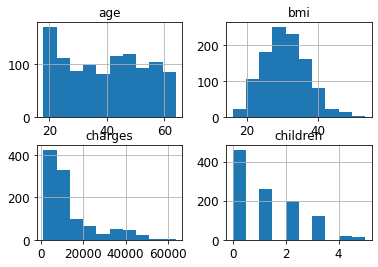

In [8]:
strat_train_set.hist()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 242 to 1304
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [10]:
strat_train_set.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.327103,30.801196,1.086916,13232.520584
std,13.897309,6.130820,1.197486,12084.248791
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.410000,0.000000,4832.368075
50%,40.000000,30.497500,1.000000,9303.297725
75%,51.000000,34.945000,2.000000,16258.075012
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
X_train = strat_train_set.iloc[:,:-1]
y_train = strat_train_set.iloc[:,-1]

In [12]:
X_train.head()

,age,sex,bmi,children,smoker,region
242,55,female,26.80,1,no,southwest
1157,23,female,23.18,2,no,northwest
944,62,male,39.93,0,no,southeast
864,51,male,25.40,0,no,southwest
342,60,female,27.55,0,no,northeast


In [13]:
y_train.head()

242     35160.13457
1157    14426.07385
944     12982.87470
864      8782.46900
342     13217.09450
Name: charges, dtype: float64

# Transform data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train_prep = full_pipeline.fit_transform(X_train)

In [15]:
X_train_prep

array([[ 1.12829229, -0.65294162, -0.07261591, ...,  0.        ,
         0.        ,  1.        ],
       [-1.17538857, -1.24367712,  0.76285743, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.63222248,  1.48969846, -0.90808924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.19242194, -0.40652985,  1.59833076, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.6243621 , -0.57705985, -0.07261591, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19242194, -1.01113621,  0.76285743, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
X_train_prep.shape

(1070, 11)

# Tests models

In [17]:
# choose model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)

In [18]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [19]:
lin_scores = cross_val_score(lin_reg, X_train_prep, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6255.37202614 5838.62668334 5793.11284292 6434.34004528 7151.62519597
 5714.72773035 6219.0236094  6342.4160785  5725.18902064 5437.26341534]
Mean: 6091.169664787869
Standard deviation: 469.5343674508753


In [20]:
forest_scores = cross_val_score(forest_reg, X_train_prep, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5239.89854397 4712.1407104  4034.46085182 5097.94623285 5647.63078225
 4587.51447083 4759.91454174 4625.93895846 3975.08961568 4429.43401903]
Mean: 4710.996872702473
Standard deviation: 490.93431167723156


In [21]:
tree_scores = cross_val_score(tree_reg, X_train_prep, y_train,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-lin_scores)
display_scores(tree_rmse_scores)

Scores: [6255.37202614 5838.62668334 5793.11284292 6434.34004528 7151.62519597
 5714.72773035 6219.0236094  6342.4160785  5725.18902064 5437.26341534]
Mean: 6091.169664787869
Standard deviation: 469.5343674508753


# Tune model hyper-parameters

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5663.494025361633 {'max_features': 2, 'n_estimators': 3}
5345.70202651407 {'max_features': 2, 'n_estimators': 10}
5085.491871262198 {'max_features': 2, 'n_estimators': 30}
5480.094200073198 {'max_features': 4, 'n_estimators': 3}
4932.173961901787 {'max_features': 4, 'n_estimators': 10}
4794.479619106428 {'max_features': 4, 'n_estimators': 30}
5427.593176310063 {'max_features': 6, 'n_estimators': 3}
4913.614150500128 {'max_features': 6, 'n_estimators': 10}
4774.109159087301 {'max_features': 6, 'n_estimators': 30}
5435.02657912721 {'max_features': 8, 'n_estimators': 3}
4974.090779076337 {'max_features': 8, 'n_estimators': 10}
4809.191779591509 {'max_features': 8, 'n_estimators': 30}
5889.663871599427 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5377.035879175042 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5580.966164354491 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5180.208589360857 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [24]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

# final model

In [25]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("charges", axis=1)
y_test = strat_test_set["charges"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [26]:
final_rmse

4784.70542138773